Simple Linear Regression
-----

**Question 1**  

The scatterplots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lab6_1_q4.png" width="600">  

(a) Describe the relationship between volume and height of these trees.  

The relationship between volume and height looks fairly linear, although the variance in volume is quite large. A linear relationship appears viable if the trees a seen as cylinders.

(b) Describe the relationship between volume and diameter of these trees.  

In the case of the relationship between volume and diameter, the situation is different .The volume hardly increases for small values. The volume then drastically increases for $d > 10$ inches. 
Compared to the volume values, the variance is strongly reduced.

View the tree as a truncated cone

(c) Suppose you have height and diameter measurements for another black cherry tree. Which of these variables would be preferable to use to predict the volume of timber in this tree using a simple linear regression model? Explain your reasoning.

This is a hard one: For the height measurements, the variance in volume is much larger, while a for the diameter a linear model (without transformation of variables) would lead to an underestimation of the volume for small measured diamters.

**Question 2**  

In `utils.csv` are the average utility bills for homes of a particular size and the average monthly temperature.  

Load the data:

In [8]:
import pandas as pd
utils = pd.read_csv('data/utils.csv')
utils.columns = [x.lower().replace(' ', '_') for x in utils.columns]
utils

,month,average_bill,average_monthly_temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69
5,Jun,94.5,78
6,Jul,120.0,84
7,Aug,142.5,89
8,Sep,97.5,79
9,Oct,84.0,64


Make a scatter plot of the data bill by tempeture. Which variable would make the most sense as the response variable?

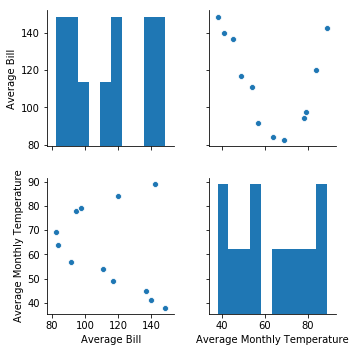

In [5]:
import seaborn as sns
sns.pairplot(utils)

From visual inspection, what is the relationship between the variables?

From visual inspection, the there appears to be a quadratic relationship between average monthly temperature and average utility bill. The the minimum bills are found around a monthly temperature of 70°F.

Fit a simple linear regression using OLS.  

In [21]:
import statsmodels.api as sms
Y = utils['average_bill']
X = utils[['average_monthly_temperature']]
X = sms.add_constant(X)
X

,const,average_monthly_temperature
0,1.0,38
1,1.0,45
2,1.0,49
3,1.0,57
4,1.0,69
5,1.0,78
6,1.0,84
7,1.0,89
8,1.0,79
9,1.0,64


In [18]:
model = sms.OLS(Y, X)
results = model.fit()
results.conf_int(alpha=0.05)
results.summary()

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           average_bill   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.416
Date:                Mon, 28 Oct 2019   Prob (F-statistic):              0.261
Time:                        13:40:58   Log-Likelihood:                -53.778
No. Observations:                  12   AIC:                             111.6
Df Residuals:                      10   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         143.6228     25.995      5.525      0.000      85.701     201.544
average_monthly_temperature    -0.4799      0.403     -1.190      0.261      -1.378       0.419
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.588
Skew:                           0.272   Prob(JB):                        0.745
Kurtosis:                       2.062   Cond. No.                         248.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Calculate and interpret the value of $R^2$.  

R_sqrd = 0.124

Interpret the intercept and slope coefficients in terms a home owner would understand.

The intercept means, that for an x value (i.e. average monthly temperature) of 0 degrees, the monhtly bill would be 144 $. The slope of -0.48 means, that the average bill will decrease by 0.48$ per degreen that the average monthly bill decreases.

What is the 95% confidence interval for the intercept?  

In [ ]:
The 95% confidence interval is 86 to 202.

Is the average monthly temperature a significant predictor of the average utility bill? Why or why not?  

In this case, when fitting the data with a linear function, the monthly temperature is not a significant predictor. However, we could transform the datase, as it as the relationship between temperature and bill appears to be a quadratic one.

Use the least squares line to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not? 

<br>

<details><summary>
Click here for a hint…
</summary>
model.predict(…)  
http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/predict.html
</details>

In [26]:
intercept = results.params[0]
slope = results.params[1]

# Prediction of bill for avg. monthly temperature of 120 degrees. 
y = slope*120-intercept
y 

# A negative bill does not appear reasonable 

-201.2089353189599

<br>
<br> 
<br>

----